# <center>Lanczos Convergence</center>

This part of the project is going to show how quickly Lanczos algorithms allows to calculate ground state energy. Lets plot the following equation:

### $$\Delta E = \frac{\tilde{\epsilon}_0 - \epsilon_0}{\epsilon_0}$$

Where $\tilde{\epsilon}_0$ is an eigenvalue aquired from Lanczos matrix, and $\epsilon_0$ is a ground energy eigenvalue from standard hamiltonian in Hilbert space. All theoretical description and code explanation is presented in file <i>LanczosStepDescription.ipynb</i> and this part will only show graphs of $\Delta E$.

In [1]:
import sys
sys.path.append('..')

In [2]:
from HamiltonianClass import QuantumState
from IPython.display import display, Latex
import numpy as np
import ipywidgets
from matplotlib import pyplot as plt

# variables used to improve notation
rangle = r'\rangle'
til_H = r'\tilde{H}'

In [3]:
L, J, delta = 10, 1, 1
quantum_state = QuantumState(L, J, delta, is_reduced=True, is_pbc=False)

In [4]:
def delta_E(real_energy, lanczos_energy):
    return (lanczos_energy - real_energy) / real_energy

In [5]:
random_vector = quantum_state.set_random_state_vector(assign=False)
ground_energy = quantum_state.get_nth_eigenvalue(0)

In [6]:
def calculate_ground_energy(real_energy, initial_state, lanczos_steps=1):
    state = QuantumState(10, 1, 1, is_reduced=True, is_pbc=False)
    state.set_state_vector(initial_state)
    state.do_n_lanczos_steps(lanczos_steps)
    eigenvalues, eigenvectors = state.lanczos_matrix_eigenstates()
    delta_e = delta_E(real_energy, eigenvalues[0])
    display(Latex(f'$\Delta E$ = {delta_e} after {state.lanczos_steps} Lanczos steps'))

In [7]:
calculate_ground_energy(ground_energy, random_vector, lanczos_steps=3)

<IPython.core.display.Latex object>

In [8]:
ipywidgets.interact(calculate_ground_energy,
                    real_energy=ipywidgets.fixed(ground_energy),
                    initial_state=ipywidgets.fixed(random_vector),
                    lanczos_steps=(1, 30, 1))

interactive(children=(IntSlider(value=1, description='lanczos_steps', max=30, min=1), Output()), _dom_classes=…

<function __main__.calculate_ground_energy(real_energy, initial_state, lanczos_steps=1)>

Now let's see how fast convergence happens for different system parameters

In [9]:
from LanczosConvergence import LanczosConvergence

In [10]:
L = 12
J = 1
delta_list = [0, 1]
lanczos_steps = 30
lanczos_convergence = LanczosConvergence(J=J, L_max=L, delta_list=delta_list, lanczos_steps=lanczos_steps,
                                         hamiltonian_reduced=True, is_pbc=False)
lanczos_convergence.simulate_lanczos_convergence(disable_print=True)

(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='Lanczos step', ylabel='$\\frac{\\tilde{\\epsilon}_0 - \\epsilon_0}{\\epsilon_0}$'>)

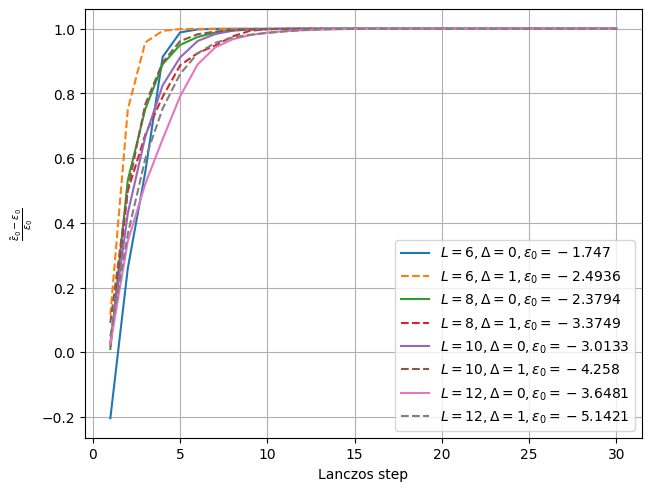

In [11]:
lanczos_convergence.plot_lanczos_convergence(set_up_figure=False)